# 선형모델
- kNN이 이해하기 쉽지만 예측이 느리고 많은 특성을 처리하는 능력이 부족해서 현업에서는 잘 사용하지 않는다.
- 이런 단점이 없는 알고리즘이 선형모델(linear model)이다.
- 선형모델은 입력특성에 대한 선형함수를 만들어 예측을 수행한다.
- 회귀(regression)의 경우 선형 모델을 위한 일반화된 예측함수는 다음과 같다.
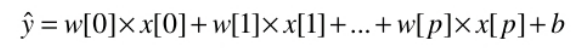
- 이식에서 x[0]부터 x[p]까지는 하나의 데이터포인트에 대한 특성을 나타내며 (zerobase니 특성의 개수는 p+1)
- w와 b는 모델이 학습할 파라미터이다.
    - 머신러닝에서 알고리즘이 주어진 데이터로부터 학습하는 파라미터를 모델 파라미터(=파라미터, 계수)
    - 반대로 모델이 학습할 수 없어서 사람이 직접 설정해 주어야하는 파라미터를 하이퍼파라미터(hyperpraameter)라고 한다.
    - 이런 하이퍼파라미터는 파이썬 클래스와 함수에 넘겨주는 인수에 포함되므로 통칭하여 매개변수라고 앞으로 부르겠다.
- y햇 은 모들에 만들어낸 예측값이다.
- 특성이 하나인 데이터 셋이라면 이식은 다음과 같다.
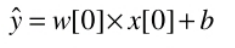
- 특성이 많아지면 w는 각 특성에 해당하는 기울기를 모두 가지게 된다.
- 다르게 생각하면 예측값은 입력 특성에 w(가중치)를 곱해서 더한 가중치의 합으로 볼 수 있다.



In [14]:
#윈도우 os
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

w[0]: 0.393906  b: -0.031804


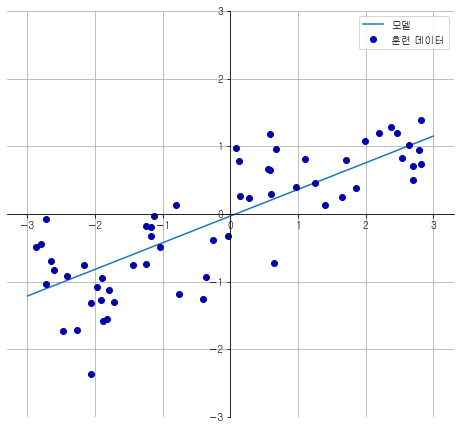

In [15]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

mglearn.plots.plot_linear_regression_wave()


- 회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개일 땐 평면(x,y,z)이 되며, 더 높은 차원(특성이 더 많음)에서는  
초평면(hyperplane)이 되는 회귀모델 특징을 가지고 있다.
- 이 직선과 KNeighborsRegressor를 사용하여 만든 것과 비교해보면 직선을 사용한 예측이 더 제약이 많아보인다.
- 즉, 데이터의 상세 정보를 모두 잃어버린(너무 general)것 처럼 보인다.
- 타깃y가 특성들의 선형 조합이라는 것은 때론 너무 비현실적인 가정이다.
- 하지만 1차원 데이터만(성질 한개)만 놓고 봐서 생긴 편견일 수 있다.
- 특성이 많은 데이터 셋이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있다.
- 특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃y도 완벽하게 **(훈련세트에 대해서만임)** 선형함수로 모델링 가능함
    - 미지수의 수보다 식의수가 더 많아 무수히 많은 해(= 해가 있다는 의미)이기 때문에

# 선형 회귀(최소제곱법)
- 회귀를 위한 선형 모델은 다양하다. 이 모델들은 훈련데이터로부터 모델 파라미터 **w와b**를 학습하는 방법과 **모델의 복잡도**를 제어하는 방법에서 차이가 난다.

- 선형 회귀(linear regression) 또는 최소제곱법(OLS, ordinary least squares)은 가장 간단하고 오래된 회귀용 선형 알고리즘.
- 선형회귀(최소제곱법)은 예측(y햇)과 훈련 세트에 있는 타깃y(정답)사이의 평균제곱오차(mean squared error)을 최소화하는 파라미터 w와 b를 찾는다.
- 평균제곱오차
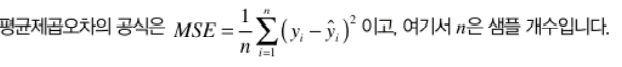
- 선형 회기는 매개변수가 없는것(=하이퍼파라미터 튜닝과정이 없음)이 장점이지만, 그래서 **모델의 복잡도를 제어할 방법도 없다.**



# 선형회귀 수학적 의미
- 파일 ~ 참고 
- 지도학습, 회귀, 선형관계를 이용하는 선형회귀에서 이전 파라미터(w1,w2,..b)로 예측된 y햇과 타깃 y간 얼마나 다른지 나타내는 지표로 최소제곱법을 사용한다.
- 최소제곱법은 y햇과 y차이 제곱의 합(모든 행을 한번에 반영)의 평균이다.
- 각 파라미터가 양또는 음으로 차이나면 제곱 특성으로 인해 cost(w,b..) = 최소제곱법이 커지게 된다. -> 각 파라미터와 cost함수 그래프는 종 모양 -> 기울기 = 0일때 cost값이 가장 작다
- 인간과 달리 **컴퓨터는**연립하지 않고 이전 기울기가 음수면 오른쪽으로 파라미터를 이동시키고 양수면 왼쪽으로 파라미터를 이동시키는 **경사하강법**을 통해 **기울기**가 0에 가깝도록한다. 이때 모든 행을 한번에 고려하며 각 파라미터 당 코스트 함수의 기울기를 생각한다.
- 기울기가 0 이 아니면 위의 과정을 반복하는데, 이 반복수를 epoch라고 한다.
- 보통은 각 파라미터당 1000회이며 이 숫자가 높을수록 더 정확한 파라미터 값을 얻을 수 있다.
- 인간은 컴퓨터와 다르게 파라미터당 기울기 = 0인 식을 세워 연립하여 구한다.

# 특성과 행과의 관계
- 특성 1개 행 40개 : 과소적합 : 행에 비해 선형식이 매우 단순하여 정확도가 떨어진다.
- 특성 100개 행 400개 : 과대적합 : 특성 수보다 행의 수가 더 많지만 특성 수가 많기에 복잡한 관계를 표현할 수 있는 정도다. LinearRegression을 이용하면 각 가중치 w가 크게 잡혀 과대적합될 가능성이 높다.
     - 이를 만약 인간이 했다면 '해가 없음' 이지만, 컴퓨터는 경사하강법으로 모든 행에 대해서 기울기를 반복 계산, 보완해서 잘 맞도록 찾는다.
- 특성 200개 행 200개 이하 : 100% 적중 (훈련세트)
    - 미지수 > 무수히 많은 해 : 해가 있다는 의미, 100% 적중 가능성
- 특성 100개 행 101개 : 연립생각하면 해 세트 한개니까 100%적중 아닌가?
    - 컴퓨터는 연립이 아니라 경사하강법을 사용, 약간 생각과 다를 수 있음

In [16]:
from sklearn.linear_model import LinearRegression
#훈련세트 + 테스트세트 전체
X, y = mglearn.datasets.make_wave(n_samples=60) #60개의 행, 특성은 1개임.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#앞서 KNN에서 분류 KNeighborsClassifier, 회귀KNeighborsRegressor에서는 
#이웃수(모델로학습시키는게 아니라 사용자가 정하는거 = 하이퍼파리미터 = 매개변수)를 매개변수로 지정하여 객체를 만든 후에
#knn,fit(X_train, y_train)을 해서 학습시킴.

#선형회귀(최소제곱법)에서는 매개변수(하이퍼파리미터)가 필요없음. 객체 생성과 동시에 훈련시켜서 
#모델의 파라미터 w와 b를 구한다.

lr = LinearRegression().fit(X_train, y_train) #LinearRegression의 매개변수 없음.

#기울기 파리미터(w)는 가중치(weight) 또는 계수(coefficient)라고 하며 lr 객체의 coef_ 속성에 저장되어 있고
#편향(offset) 또는 절편(intercept)파라미터 (b)는 intercept_속성에 저장되어있다.

print("lr.coef_" ,lr.coef_)
print("lr.intercept_", lr.intercept_)

#scikit-learn은 훈련데이터에서 유도된 속성(모델파라미터)은 항상 끝에 밎줄을 붙인다. 
#(사용자가 지정한 매개변수(하이퍼 파리미터)와 구분하기 위함)

#intercept_ 속성은 항상 실수값 하나이지만
#coef_ 속성은 각 입력 특성에 하나씩 대응되는 numpy 배열이다. (데이터의 수가 아니라 특성 수)
#위의 예시는 특성이하나이기 때문에 lr.coef_도 하나의 값을 가진다. 

lr.coef_ [0.39390555]
lr.intercept_ -0.031804343026759746


In [17]:
# 성능확인 
print("훈련세트점수 : {:.2f}".format(lr.score(X_train,y_train)))
print("테스트세트점수 : {:.2f}".format(lr.score(X_test, y_test)))

#특성의 수가 데이터 행의개수보다 많다면 식의 수가 더 많기에 '훈련세트'에 대해서 정확도 1


훈련세트점수 : 0.67
테스트세트점수 : 0.66


- R제곱 값이 0.66은 별로 좋은 값도 아니고, 훈련과 테스트세트 차이가 별로 안남
- 모델이 너무 일반화된것 각 특성을 반영하지 못한 것 (일차함수꼴이니 당연함)
- 즉 과소적합(underfitting)인 상태
- 1차원 데이터 셋(열이 하나)에서는 모델이 매우 단순(직선)이므로 과대적합을 걱정할 필요가 없다.

- 특성이 많은 고차원 데이터 셋에서는 '훈련 세트'에 대한 성능이 매우 높아져 과대적합 될 가능성이 높다 (미지수와 식의 개수가 비슷해질 수록)
- 하지만 테스트 세트에 대해서 정확도는 떨어지는 과대적합이 될 가능성이 높다.


In [18]:
# 보스턴 집값 데이터 셋: 고차원 데이터셋, 선형회귀에서는 과대적합 가능성있음.
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train, y_train) #fit 함수는 자기자신의 객체를 반환해서 선언과 동시에 사용가능함.


C:\Users\khsls\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [19]:
print("훈련 세트 점수 {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수 {:.2f}".format(lr.score(X_test,y_test)))

훈련 세트 점수 0.95
테스트 세트 점수 0.61


- **훈련데이터와 테스트데이터 사이의 이런 성능차이는 과대적합이 되었다는 확실한 신호**

- 선형 모델 중 모델의 복잡도를 제어할 수 있는 모델을 사용해야한다!

# 리지(Ridge)회귀
- 선형함수 사용, cost함수로는 똑같이 최소제곱법을 사용한다.
- 선형회귀와 리지회귀가 다른점은, 리지회귀는 가중치의 절댓값을 가능한 작게 (0에 가깝게)만들어 모든 특성이 출력에 주는 영향을 최소한으로 만든다.(=기울기를 작게)
- 이러한 제약을 규제(regularization)라고 한다.
     - 규제란 과대적합이 되지 않도록 모델을 강제로 제한하는 것을 의미한다.
- 리지회귀에서 사용하는 규제방식을 **L2규제**라고 한다.

In [20]:
#LinearRegression과 다른 클래스를 사용한다!
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("훈련세트점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트세트점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련세트점수 : 0.89
테스트세트점수 : 0.75


C:\Users\khsls\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

- Ridge모델에서는 각 가중치의 영향을 줄여 훈련세트에 대해서는 LinearRegression 보다 더 낮은 정확도를 보였지만 더 일반화된 모델이 되어 테스트 세트에서는 더 높은 정확도를 보여준다. 
- 테스트 세트의 정확도가 중요하기 때문에 Ridge 모델을 선택해야한다.
- 알파값을 따로 지정하지 않으면 (매개변수를 따로 넣지 않으면) Ridge 알파의 디폴트 값은 1.0이다. 선형회귀는 0.00001임. ->아주 작은 알파값은 선형회귀와 결과가 같아짐
- 최적의 알파값은 데이터 셋의 크기에 따라 달려있고 높일수록 제약이 심해져 각 가중치는 더 작아지게 되어 일반화에 도움을 줄 수 있다.
    - **알파값이 작다고 테스트 세트에서 더 좋은 결과를 낸다는 보장은 없다**


In [21]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("훈련세트점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트세트점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련세트점수 : 0.79
테스트세트점수 : 0.64


In [22]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("훈련세트점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트세트점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련세트점수 : 0.93
테스트세트점수 : 0.77


- alpha값에 따라 모델의 가중치(coef)속성이 어떻게 달라지는지 확인해 보자.
- alpha값이 클수록 coef는 당연히 작아짐. 무조건.

<class 'numpy.ndarray'>
(-5.15, 108.15)


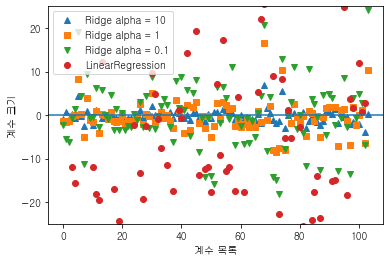

In [23]:
#한 평면에 여러 그래프를 한번에 그릴 때 : fig, ax 지정후 해도 되고 아래처럼 해도되고

#alpha (값1개)-> 기호로 표시됨
#x 값 : 행 넘버 
#y 값 : coef 크기 
print(type(ridge10.coef_))
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = 'LinearRegression')
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

# x 범위 제한하지 않으면 데이터에 따라 자동으로 설정됨
#plt.xlim(600) 기존 값이 시작 20, 끝 100 이었다면, 시작 600 끝 100 으로 오른쪽으로 갈수록 감소하는 x 형태
#plt.xlim(시작, 끝)
#plt.xlim의 반환값은 시작과 끝의 정보가 튜플로 저장되어 있음 
xlims = plt.xlim()

print(xlims) 
#plt.hlines(y값, 시점, 종점) 시점과 종점을 잇는 수평선 생성 
plt.hlines(0, xlims[0],xlims[1]) #인덱스로 시작과 끝을 정함 

plt.xlim(xlims) #의미 없는 행 
plt.ylim(-25,25)
plt.legend()







- 규제 효과를 이해하는 다른 방법은 alpha 값을 고정하고 훈련데이터의 크기를 변환시켜 보는 것
- 데이터셋의 크기에 따른 모델의 성능변화를 나타낸 그래프를 학습곡선(learning curve)라고 한다.

C:\Users\khsls\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

(26.4, 501.6)


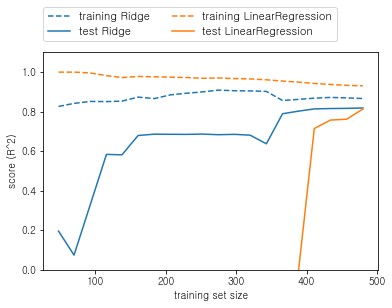

In [24]:
#보스턴 주택가격 데이터셋에서 여러가지 크기로 샘플링하여 LinearRegression과 Ridge(alpha = 1)를 적용한것 
mglearn.plots.plot_ridge_n_samples()
print(plt.xlim())

- 모든 데이터 셋에서 훈련세트에 대해 선형회귀가 리지보다 정확도가 높다.
- 하지만 모든 데이터 셋에서 테스트세트에 대해 리지가 더 정확도가 높다. (계수가 작아져 더 일반화 되었기 때문에)
- 특별히 작은 데이터 셋(행의수가 적음)에서는 더 그렇다.
- 데이터 셋이 작을수록 특성수의 특징(복잡도)는 더 증가하여 훈련세트에 대해서는 점점더 완벽해지지만, 그만큼 과적합되어   
테스트 세트에 대해서는 정확도가 낮아진다. 선형회귀는 데이터 셋 크기가 작을수록 각 계수가 더 커지기 때문에 이런 현상은 더 심해진다.
- 리지는 alpha값으로 w를 작게 했기 때문에 작은 데이터 셋에서도 정확도가 있는 것이다.
- 두 모델의 성능은 데이터가 많아질수록 좋아지고(훈련세트에 대해서는 떨어지더라도 더 일반화되어 테스트세트에 대해서는 정확도가 증가한다) 마지막에는 선혀회귀가 리지회귀를 따라잡습니다.
- 데이터를 충분히 주면 규제 항은 덜 중요해져서 리지회귀와 선형회귀의 성능이 같아질 것이다.
- 선형회귀의 훈련데이터 성능이 감소한다. -> 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문이다.
----------------------------------------  
- 특성에 비해 데이터가 많아질수록 훈련세트에 대한 정확도는 떨어지지만 더 일반화되어 테스트 세트 정확도는 증가한다.
- 특성에 비해 데이터수가 그렇게 많지 않는 경우라면 선형회귀 대신 리지회귀의 알파값을 적절히 조절하여 성능을 높일 수 있다.
- 리지회귀가 더 빛을 바라는 순간은 데이터수가 많지 않을 때이다.
- 데이터 수가 많아지다 어느 시점 부터는 선형회귀와 리지회귀 성능이 같아진다.

- Ridge 클래스의 solver 매개변수(하이퍼파라미터)에서 여러가지 알고리즘을 지정할 수 있다. 기본값은 'auto'로 훈련데이터가 희소 행렬 이면 켤레기울기법인 'sparse_cg'를 사용하고 그렇지 않으면 해석적으로 문제의 해를 구하는 방법인 'choleksy'를 사용한다. 계수 값을 양수로 강제하기 위해 postive 매개변수를 True로 지정하면 L-BFGS-B알고리즘인 'lbfgs'가 사용된다. 이외에도 확률적 평균 경사 하강법인 'sag'와 SAG의 개선버전인 'saga'를 사용할 수 있다.

- 두 방식은 특성과 샘플이 많은 경우에 종종 다른 알고리즘보다 속도가 빠르다. 'sparse_cg'일 때 반복횟수인 max_iter 매개변수 기본값은 샘플 개수의 10로 지정된다. 'sag', 'saga'일 경우 1000이고 'lbfgs'일 경우 15000이다. 실제 반복횟수는 Ridge zmffotm rorcpdml n_iter_속성에서 확인할 수 있다. 

# 라소
- 선형회귀에 규제를 적용하는데 Ridge의 대안으로 Lasso가 있다. 리지 회귀에서와 같이 라소도 계수를 0에 가깝게 만들려고 한다.
- 하지만 방식이 조금 다르며 이를 L1 규제라고 한다.
- L1규제의 결과로 라소를 사용할 때 어떤 계수는 정말 0이 된다. 이말은 모델에서 완전히 제외되는 특성이 생긴다는 뜻
- 특성 선택이 자동으로 이루어진다는 의미이며, 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 모델의 가장 중요한 특성이 뭔지 드러내준다. 

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("훈련세트점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트세트점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

#0이 아닌것이 True, 0인 거면 False
#True는 1로 취급 False는 0으로 취급 
print(lasso.coef_ != 0)

훈련세트점수 : 0.29
테스트세트점수 : 0.21
사용한 특성의 개수: 4
[False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False  True False False False False False False
 False False False False False False False False]


- lasso는 훈련세트와 테스트 세트에서 결과가 좋지 않음 
- 이는 과소적합이며 104개 특성중 4개만 사용함
---------------------------  
- alpha 값의 조절로 규제의 정도를 조절 할 수 있다.
- 과소적합을 줄이기 위해서 alpha를 줄여 계수의 영향을 크게 하면 된다.
- 경사하강법 : 기울기 - 알파* 기울기이기 때문에 알파 값을 줄이면 조금씩 접근하기 때문에 답을 찾기위한 최대 반복횟수를 늘려야 한다
- *최대*반복횟수인 이유: 중간에 기울기가 0이 나오면 그게 최적값이고 중단되기 때문에
- 알파값을 작게 하면 각 계수의 영향이 커지기 때문에 이전보다 0인 계수의 값이 줄어든다.

In [28]:
lasso001  = Lasso(alpha = 0.01, max_iter = 50000).fit(X_train, y_train)
print("훈련세트점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트세트점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련세트점수 : 0.90
테스트세트점수 : 0.77
사용한 특성의 개수: 33


- alpha 값을 줄이면 모델의 복잡도는 증가하여 훈련세트와 테스트 세트의 성능이 좋아진다.
- 모델이 복잡한게 무조건 안좋은게 아님! 주의하자
- ridge보다 성능은 조금 나은데 사용된 특성이 33개로 더 적어서 분석하기 용이하다.
- 즉 특성이 여러개여서 해석하기 복잡할 때 라소회귀를 이용하면 어떤 것이 더 중요한 특성인지 볼 수 있으며, 분석 용이하다.
- 만약 과소적합 되거나 사용된 특성이 너무 적다면 alpha 값을 조절해서 해결할 수 있다.
- 이것도 역시 alpha 값이 너무 낮으면 선형회귀와 차이가 없다.

In [29]:
#alpha 값을 너무 낮추면 선형회귀와 차이가 없다.
lasso00001 = Lasso(alpha=0.0001, max_iter = 50000).fit(X_train, y_train)
print("훈련세트점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트세트점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련세트점수 : 0.95
테스트세트점수 : 0.64
사용한 특성의 개수: 96


Text(0, 0.5, '계수크기')

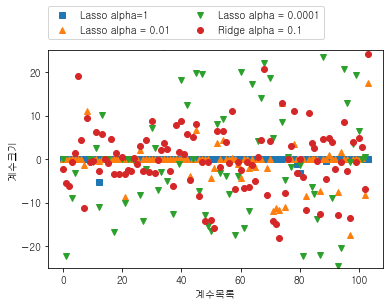

In [30]:
plt.plot(lasso.coef_, "s", label = 'Lasso alpha=1')
plt.plot(lasso001.coef_, "^", label = 'Lasso alpha = 0.01')
plt.plot(lasso00001.coef_, "v", label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = 'Ridge alpha = 0.1')
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수목록")
plt.ylabel("계수크기")

- ridge모델을 사용하면 어떤 계수도 0이 될 수 없다
- 앞서 봤듯이 ridge01과 lasso001의 모델 성능은 비슷하지만 고려되는 특성의 수는 lasso가 더 적다.
- 보통은 리지를 선호하지만 특성이 많고 일부분만 중요하다면 라소가 더 좋은 선택이 된다.
- 또한 분석하기 쉬운 모델을 원한다면 라소가 일부 특성만 이용하므로 더 쉽게 해석할 수 있는 모델을 만들어 준다.
-------------------------------  
- scikit-learn은 Lasso와 Ridge의 패널티를 결합한 ElasticNet도 제공한다.
- 이 조합은 최상의 성능을 내지만 L1규제와 L2규제를 위한 매개변수(하이퍼파리미터) 두개를 조정해야한다.